In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
pwd

'c:\\Users\\a\\Downloads\\FInalProjectCapstone\\final_code\\Med-ViT-3D'

In [11]:
file_path = ".\history_record"
files = os.listdir(file_path)
results = []
for f in files:
    df = pd.read_csv(os.path.join(file_path, f))
    df["epoch"] = df.index + 1

    # identify model type and dataset
    model_type = f.split("_")[0]      # e.g. MedViT2D / MedViT3D
    dataset = f.split("_")[1].replace(".csv","")    # keep full dataset name if you like

    # append row for each epoch
    for _, row in df.iterrows():
        results.append({
            "model": model_type,
            "dataset": dataset,
            "epoch": row["epoch"],
            "train_AUC": row["train_auc"],
            "train_ACC": row["train_acc"],
            "val_AUC": row["val_auc"],
            "val_ACC": row["val_acc"],
            "epoch_time": row["epoch_time"]
        })

summary = pd.DataFrame(results)
print(summary.head())

      model     dataset  epoch  train_AUC  train_ACC   val_AUC   val_ACC  \
0  MedViT2D  bloodmnist    1.0   0.832808   0.266667  0.932541  0.266667   
1  MedViT2D  bloodmnist    2.0   0.940402   0.716667  0.965912  0.800000   
2  MedViT2D  bloodmnist    3.0   0.948442   0.733333  0.973395  0.800000   
3  MedViT2D  bloodmnist    4.0   0.946633   0.700000  0.988370  0.733333   
4  MedViT2D  bloodmnist    5.0   0.949163   0.783333  0.996914  0.933333   

   epoch_time  
0   48.818381  
1   48.637282  
2   48.581732  
3   48.625180  
4   48.447099  


<>:1: SyntaxWarning: invalid escape sequence '\h'
<>:1: SyntaxWarning: invalid escape sequence '\h'
C:\Users\a\AppData\Local\Temp\ipykernel_13424\3478952744.py:1: SyntaxWarning: invalid escape sequence '\h'
  file_path = ".\history_record"


In [12]:
summary.head()

,model,dataset,epoch,train_AUC,train_ACC,val_AUC,val_ACC,epoch_time
0,MedViT2D,bloodmnist,1.0,0.832808,0.266667,0.932541,0.266667,48.818381
1,MedViT2D,bloodmnist,2.0,0.940402,0.716667,0.965912,0.800000,48.637282
2,MedViT2D,bloodmnist,3.0,0.948442,0.733333,0.973395,0.800000,48.581732
3,MedViT2D,bloodmnist,4.0,0.946633,0.700000,0.988370,0.733333,48.625180
4,MedViT2D,bloodmnist,5.0,0.949163,0.783333,0.996914,0.933333,48.447099


In [20]:
import os
import pandas as pd

file_path = ".\\history_record"
files = os.listdir(file_path)

all_records = []

for f in files:
    df = pd.read_csv(os.path.join(file_path, f))
    df["epoch"] = df.index + 1

    model_type = f.split("_")[0]
    dataset = f.split("_")[1]

    for i, row in df.iterrows():
        all_records.append({
            "model": model_type,
            "dataset": dataset,
            "epoch": row["epoch"],
            "train_auc": row["train_auc"],
            "train_acc": row["train_acc"],
            "val_auc": row["val_auc"],
            "val_acc": row["val_acc"],
            "epoch_time": row["epoch_time"]
        })

df_long = pd.DataFrame(all_records)
print(df_long.head())


      model         dataset  epoch  train_auc  train_acc   val_auc   val_acc  \
0  MedViT2D  bloodmnist.csv    1.0   0.832808   0.266667  0.932541  0.266667   
1  MedViT2D  bloodmnist.csv    2.0   0.940402   0.716667  0.965912  0.800000   
2  MedViT2D  bloodmnist.csv    3.0   0.948442   0.733333  0.973395  0.800000   
3  MedViT2D  bloodmnist.csv    4.0   0.946633   0.700000  0.988370  0.733333   
4  MedViT2D  bloodmnist.csv    5.0   0.949163   0.783333  0.996914  0.933333   

   epoch_time  
0   48.818381  
1   48.637282  
2   48.581732  
3   48.625180  
4   48.447099  


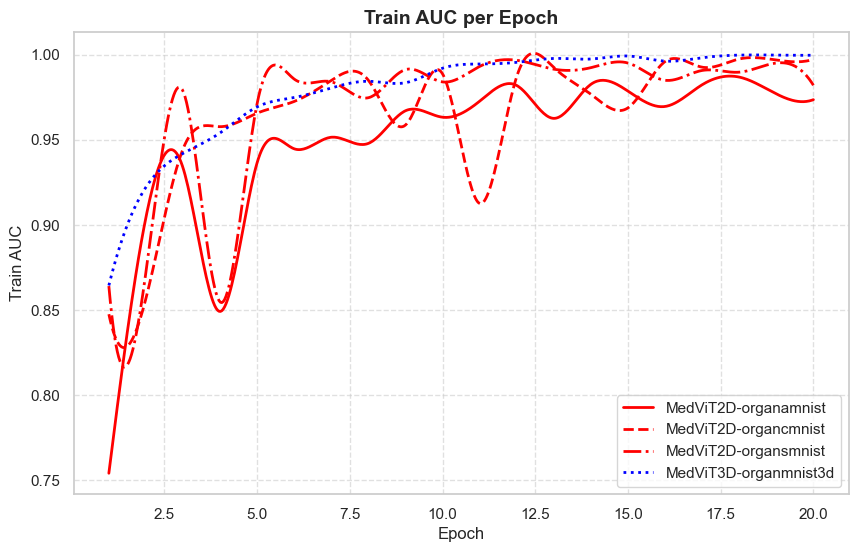

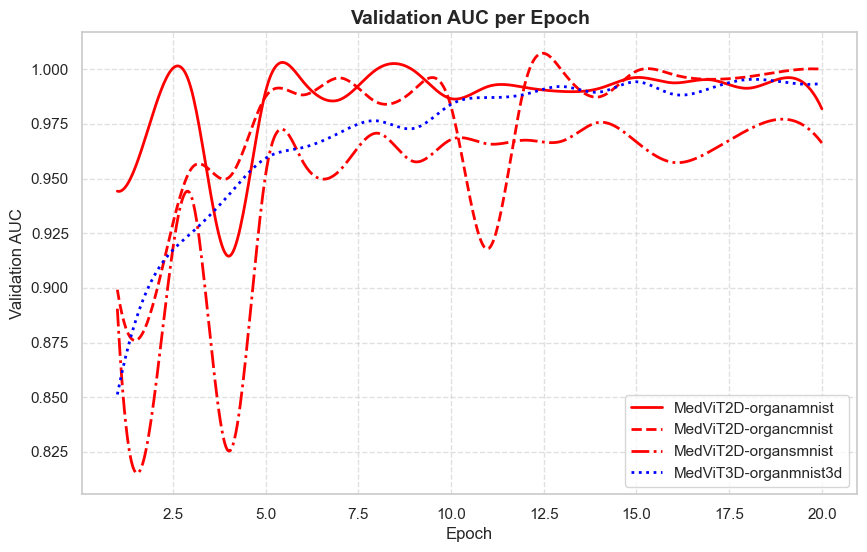

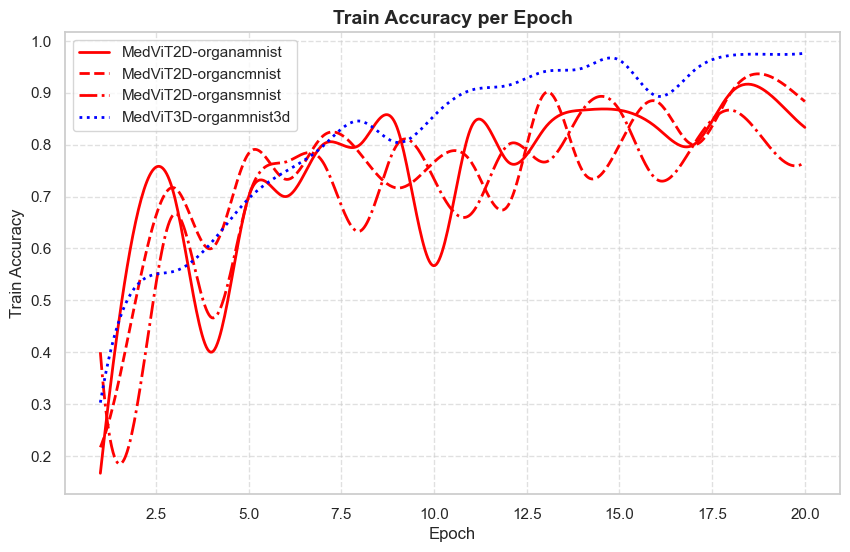

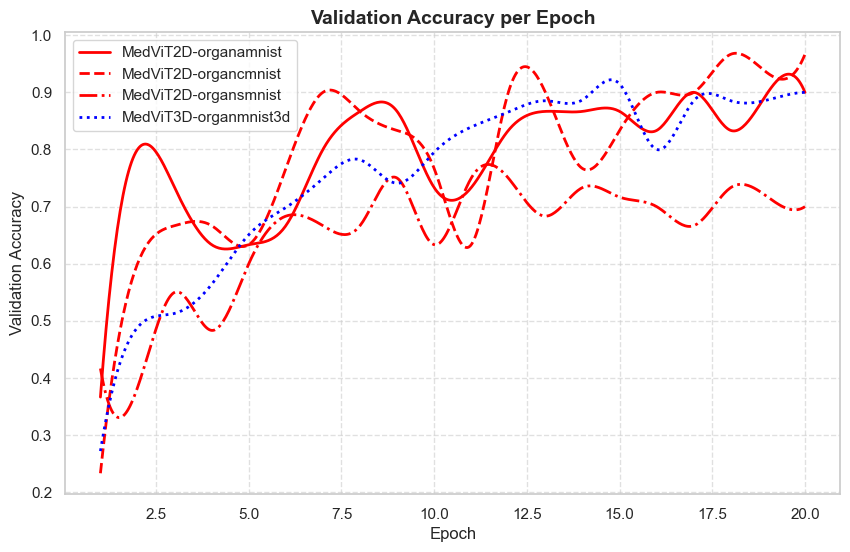

In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

file_path = ".\\history_record"
files = os.listdir(file_path)

# Collect all records (long format)
all_records = []
for f in files:
    if not f.endswith(".csv"):
        continue
    elif ("organ" not in f):
        continue

    df = pd.read_csv(os.path.join(file_path, f))
    df["epoch"] = df.index + 1

    # remove extension
    base_name = os.path.splitext(f)[0]
    parts = base_name.split("_")

    model_type = parts[0]
    dataset = "_".join(parts[1:])  # in case dataset name has "_"

    for _, row in df.iterrows():
        all_records.append({
            "model": model_type,
            "dataset": dataset,
            "epoch": row["epoch"],
            "train_auc": row["train_auc"],
            "train_acc": row["train_acc"],
            "val_auc": row["val_auc"],
            "val_acc": row["val_acc"],
            "epoch_time": row["epoch_time"]
        })

df_long = pd.DataFrame(all_records)

# -------- Plotting function -------- #
def plot_metric(metric, title, ylabel):
    plt.figure(figsize=(10,6))
    
    # Colors: only 2 (Red & Blue) for models
    models = df_long["model"].unique()
    base_colors = ["red", "blue"]
    color_map = {m: base_colors[i % len(base_colors)] for i, m in enumerate(models)}
    
    # Line styles for datasets
    datasets = df_long["dataset"].unique()
    linestyles = ["-", "--", "-.", ":"]
    linestyle_map = {d: linestyles[i % len(linestyles)] for i, d in enumerate(datasets)}
    
    for (model, dataset), group in df_long.groupby(["model","dataset"]):
        group = group.sort_values("epoch")
        x = group["epoch"].values
        y = group[metric].values
        
        if len(x) > 3:
            # smoother: 500 points instead of 300
            x_smooth = np.linspace(x.min(), x.max(), 500)
            y_smooth = make_interp_spline(x, y, k=3)(x_smooth)
            plt.plot(x_smooth, y_smooth,
                     color=color_map[model],
                     linestyle=linestyle_map[dataset],
                     linewidth=2,
                     label=f"{model}-{dataset}")
        else:
            plt.plot(x, y,
                     color=color_map[model],
                     linestyle=linestyle_map[dataset],
                     linewidth=2,
                     label=f"{model}-{dataset}")

    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

# -------- Generate all plots -------- #
plot_metric("train_auc", "Train AUC per Epoch", "Train AUC")
plot_metric("val_auc", "Validation AUC per Epoch", "Validation AUC")
plot_metric("train_acc", "Train Accuracy per Epoch", "Train Accuracy")
plot_metric("val_acc", "Validation Accuracy per Epoch", "Validation Accuracy")
